In [1]:
# File name: UCF Crime Preprocessing (With FPS reduction).ipynb
# Author: Sai Vishwanath V
# Date created: 9/9/2019
# Date last modified: 25/12/2019
# Python Version: 3

## The contents of this notebook are as follows 

1. Modifying the get_hof function from video_stuff.py to perform Sub-nyquist undersampling of frames
2. Analysis to determine ideal bagsizes
3. Analysis to minimize the data loss due to undersampling

In [6]:
import make_hof_half
from make_hof_half import get_processed_hof

In [4]:
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
import cv2

In [8]:
ls UCF_Crime/

 64_16/                        RAW/
 Anomaly_Dataset_reduced/      TESTER/
 Anomaly_Dataset_reduced.zip   UCF_CRIME_COMPLETE_8/
'Deleted By Mistake'/          UCF_CRIME_COMPLETE_8_UNBIASED/
'Deleted By Mistake.zip'       __pycache__/


## Get hof , with reduced fps

In [4]:
from video_stuff import get_frames_per
from video_stuff import hof,getFlow

In [35]:
def get_hof(videopath):
    cap = cv2.VideoCapture(videopath)
    fps_counter = 0
    feat_sets = []
    ret, frame_prev = cap.read()
    if not ret:
        return
    frame_prev = cv2.cvtColor(frame_prev, cv2.COLOR_BGR2GRAY)
    frame_prev = cv2.resize(frame_prev, (120,160))
    while cap.isOpened():
        if (fps_counter%2==0): #Reducing the fps by half (Reading every 2nd frame)
            _,_ = cap.read()
        else:
            ret, frame_next = cap.read()
            if not ret:
                break
            frame_next = cv2.cvtColor(frame_next, cv2.COLOR_BGR2GRAY)
            frame_next = cv2.resize(frame_next, (120,160))
            feat_sets.append(hof(flow = getFlow(frame_prev, frame_next), orientations = 5, cells_per_block = (6,6), pixels_per_cell = (20,20)))
            frame_prev = frame_next.copy()
        fps_counter+=1
    feat_sets = np.asarray(feat_sets)
    col_names = list('feat_' + str(i) for i in range(feat_sets.shape[-1]))
    #hog_feats = np.asarray(hog_feats)
    tuple_feats = list(map(lambda x: tuple(feat_sets[x]), range(len(feat_sets))))
    df = pd.DataFrame(tuple_feats, columns = col_names)
    df['video_path'] = videopath
    return df


In [36]:
pwd

'/home/adithyapa4444_gmail_com'

In [40]:
%%time 
start = time()
df = get_hof('/home/adithyapa4444_gmail_com/UCF_Crime/Anomaly_Dataset_reduced/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Sai_considers_this_abuse/Abuse004_x264-Copy1.mp4') 
print (time()-start)

54.686981439590454
CPU times: user 59.6 s, sys: 513 ms, total: 1min
Wall time: 54.7 s


In [44]:
import video_stuff as vs

In [45]:
%%time 
start = time()
df = vs.get_hof('/home/adithyapa4444_gmail_com/UCF_Crime/Anomaly_Dataset_reduced/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Sai_considers_this_abuse/Abuse004_x264-Copy1.mp4') 
print (time()-start)

104.97170925140381
CPU times: user 1min 50s, sys: 512 ms, total: 1min 50s
Wall time: 1min 44s


In [42]:
from video_stuff import get_frames_per

In [43]:
get_frames_per('/home/adithyapa4444_gmail_com/UCF_Crime/Anomaly_Dataset_reduced/Anomaly_Videos/Anomaly-Videos-Part-1/Abuse/Sai_considers_this_abuse/Abuse004_x264-Copy1.mp4')

16794

In [41]:
df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_531,feat_532,feat_533,feat_534,feat_535,feat_536,feat_537,feat_538,feat_539,video_path
0,0.0,0.0,0.0,0.0,8.969725e-07,0.0,0.0,0.0,0.0,1.199374e-04,...,0.0,0.0,0.0,1.682908e-04,0.0,0.0,0.0,0.0,3.202408e-05,/home/adithyapa4444_gmail_com/UCF_Crime/Anomal...
1,0.0,0.0,0.0,0.0,5.661706e-08,0.0,0.0,0.0,0.0,3.146997e-03,...,0.0,0.0,0.0,2.318265e-03,0.0,0.0,0.0,0.0,7.305093e-06,/home/adithyapa4444_gmail_com/UCF_Crime/Anomal...
2,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1.884182e-07,...,0.0,0.0,0.0,2.424215e-07,0.0,0.0,0.0,0.0,2.244700e-09,/home/adithyapa4444_gmail_com/UCF_Crime/Anomal...
3,0.0,0.0,0.0,0.0,2.605926e-06,0.0,0.0,0.0,0.0,1.959036e-03,...,0.0,0.0,0.0,1.368150e-03,0.0,0.0,0.0,0.0,2.072540e-04,/home/adithyapa4444_gmail_com/UCF_Crime/Anomal...
4,0.0,0.0,0.0,0.0,5.217482e-04,0.0,0.0,0.0,0.0,2.916423e-03,...,0.0,0.0,0.0,4.239318e-03,0.0,0.0,0.0,0.0,2.203796e-04,/home/adithyapa4444_gmail_com/UCF_Crime/Anomal...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8391,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,6.859106e-07,0.0,0.0,0.0,0.0,1.235058e-17,/home/adithyapa4444_gmail_com/UCF_Crime/Anomal...
8392,0.0,0.0,0.0,0.0,4.527231e-05,0.0,0.0,0.0,0.0,2.009890e-04,...,0.0,0.0,0.0,3.846750e-04,0.0,0.0,0.0,0.0,9.910316e-06,/home/adithyapa4444_gmail_com/UCF_Crime/Anomal...
8393,0.0,0.0,0.0,0.0,3.645544e-13,0.0,0.0,0.0,0.0,2.750626e-09,...,0.0,0.0,0.0,-5.899475e-20,0.0,0.0,0.0,0.0,-1.274925e-23,/home/adithyapa4444_gmail_com/UCF_Crime/Anomal...
8394,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,1.890519e-04,0.0,0.0,0.0,0.0,2.070397e-13,/home/adithyapa4444_gmail_com/UCF_Crime/Anomal...


## Cursory visualization 

Typically when we aquire a new dataset to implement EdgeML it requires us to view the distribution of the number of frames across a video and the length of the video to determine the ideal bagsize. 

In [7]:
# src_dir = '/home/adithyapa4444_gmail_com/UCF_CRIME_COMPLETE_8/'
src_dir = '/home/adithyapa4444_gmail_com/UCF_Crime/Full_UCrime/annotated/'
# src_dir = '/home/adithyapa4444_gmail_com/UCF_Crime/EDA _purposes_reduced_fps'

However we can use the same analysis as performed on UCFCrime already and divide the bagsize by reduction factor. <br>SAME ANALYSIS - THEREFORE BAGSIZE = BAGSIZE/2 

In [3]:
import make_hof

## Preprocessing with bagsize 64 (128/2) 

In [8]:
%%time 
df_64 = get_processed_hof(src_folder=src_dir,bagsize=128)
df_64.to_csv('/home/adithyapa4444_gmail_com/UCF_Crime/Crime_HalfFPS.csv')

/home/adithyapa4444_gmail_com/make_hof_half.py:86: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dfa=pd.concat([dfa,df])


CPU times: user 1h 12min 49s, sys: 2min 28s, total: 1h 15min 17s
Wall time: 1h 6min 39s


In [5]:
%%time
print(1+2)


3
CPU times: user 253 µs, sys: 73 µs, total: 326 µs
Wall time: 349 µs


In [11]:
df_64['label'].value_counts()

5    314880
1     60928
0     32384
7     18560
6     12928
4     12160
2     11648
3      5248
Name: label, dtype: int64

(75136, 542)

In [ ]:
import pandas as pd

In [13]:
df_128 = pd.read_csv('/home/adithyapa4444_gmail_com/UCF_Crime/Crime_128_UB.csv')
print(df_128.shape)

(150272, 543)


In [7]:
del df_64

## Making 4d emi data 

In [12]:
from make_emi_data import emirnn_preprocess

In [13]:
Bag_Size =64
No_of_features =540
ExtractedDir = '/home/adithyapa4444_gmail_com/UCF_Crime/half/'
NumClass = 8
SubinstanceLen = 32
SubinstanceStride = 8
Data_csv = '/home/adithyapa4444_gmail_com/UCF_Crime/Crime_HalfFPS.csv'

In [14]:
%%time
emirnn_preprocess(bagsize=Bag_Size,
                  no_of_features=No_of_features,
                  extractedDir=ExtractedDir,
                  numClass=NumClass,
                  subinstanceLen=SubinstanceLen,
                  subinstanceStride=SubinstanceStride,
                  data_csv=Data_csv,
                  raw_create=0
                 )

(468736, 540)
(468736, 1)
(7324, 64, 540)
(5273, 64, 540)
Num train 5273
(1465, 64, 540)
Num test 1465
(586, 64, 540)
Num val 586
preprocessing is over....
CPU times: user 32.8 s, sys: 17.5 s, total: 50.3 s
Wall time: 50.8 s


## Running EMI -LSTM 

In [15]:
from rnn import EMI_DataPipeline
from rnn import EMI_BasicLSTM, EMI_FastGRNN, EMI_FastRNN, EMI_GRU
from emirnnTrainer import EMI_Trainer, EMI_Driver
import utils
import os 
import numpy as np
import tensorflow as tf

/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/adithyapa4444_gmail_com/.local/lib

In [16]:
def lstm_experiment_generator(params, path = './DSAAR/64_16/'):
    """
        Function that will generate the experiments to be run.
        Inputs : 
        (1) Dictionary params, to set the network parameters.
        (2) Name of the Model to be run from [EMI-LSTM, EMI-FastGRNN, EMI-GRU]
        (3) Path to the dataset, where the csv files are present.
    """
    
    #Copy the contents of the params dictionary.
    lstm_dict = {**params}
    
    #---------------------------PARAM SETTING----------------------#
    
    # Network parameters for our LSTM + FC Layer
    NUM_HIDDEN = params["NUM_HIDDEN"]
    NUM_TIMESTEPS = params["NUM_TIMESTEPS"]
    ORIGINAL_NUM_TIMESTEPS = params["ORIGINAL_NUM_TIMESTEPS"]
    NUM_FEATS = params["NUM_FEATS"]
    FORGET_BIAS = params["FORGET_BIAS"]
    NUM_OUTPUT = params["NUM_OUTPUT"]
    USE_DROPOUT = True if (params["USE_DROPOUT"] == 1) else False
    KEEP_PROB = params["KEEP_PROB"]

    # For dataset API
    PREFETCH_NUM = params["PREFETCH_NUM"]
    BATCH_SIZE = params["BATCH_SIZE"]

    # Number of epochs in *one iteration*
    NUM_EPOCHS = params["NUM_EPOCHS"]
    # Number of iterations in *one round*. After each iteration,
    # the model is dumped to disk. At the end of the current
    # round, the best model among all the dumped models in the
    # current round is picked up..
    NUM_ITER = params["NUM_ITER"]
    # A round consists of multiple training iterations and a belief
    # update step using the best model from all of these iterations
    NUM_ROUNDS = params["NUM_ROUNDS"]
    LEARNING_RATE = params["LEARNING_RATE"]

    # A staging direcory to store models
    MODEL_PREFIX = params["MODEL_PREFIX"]
    
    #----------------------END OF PARAM SETTING----------------------#
    
    #----------------------DATA LOADING------------------------------#
    
    x_train, y_train = np.load(path + 'x_train.npy'), np.load(path + 'y_train.npy')
    x_test, y_test = np.load(path + 'x_test.npy'), np.load(path + 'y_test.npy')
    x_val, y_val = np.load(path + 'x_val.npy'), np.load(path + 'y_val.npy')

    # BAG_TEST, BAG_TRAIN, BAG_VAL represent bag_level labels. These are used for the label update
    # step of EMI/MI RNN
    BAG_TEST = np.argmax(y_test[:, 0, :], axis=1)
    BAG_TRAIN = np.argmax(y_train[:, 0, :], axis=1)
    BAG_VAL = np.argmax(y_val[:, 0, :], axis=1)
    NUM_SUBINSTANCE = x_train.shape[1]
    print("x_train shape is:", x_train.shape)
    print("y_train shape is:", y_train.shape)
    print("x_test shape is:", x_val.shape)
    print("y_test shape is:", y_val.shape)
    
    #----------------------END OF DATA LOADING------------------------------#    
    
    #----------------------COMPUTATION GRAPH--------------------------------#
    
    # Define the linear secondary classifier
    def createExtendedGraph(self, baseOutput, *args, **kwargs):
        W1 = tf.Variable(np.random.normal(size=[NUM_HIDDEN, NUM_OUTPUT]).astype('float32'), name='W1')
        B1 = tf.Variable(np.random.normal(size=[NUM_OUTPUT]).astype('float32'), name='B1')
        y_cap = tf.add(tf.tensordot(baseOutput, W1, axes=1), B1, name='y_cap_tata')
        self.output = y_cap
        self.graphCreated = True

    def restoreExtendedGraph(self, graph, *args, **kwargs):
        y_cap = graph.get_tensor_by_name('y_cap_tata:0')
        self.output = y_cap
        self.graphCreated = True

    def feedDictFunc(self, keep_prob=None, inference=False, **kwargs):
        if inference is False:
            feedDict = {self._emiGraph.keep_prob: keep_prob}
        else:
            feedDict = {self._emiGraph.keep_prob: 1.0}
        return feedDict

    EMI_BasicLSTM._createExtendedGraph = createExtendedGraph
    EMI_BasicLSTM._restoreExtendedGraph = restoreExtendedGraph

    if USE_DROPOUT is True:
        EMI_Driver.feedDictFunc = feedDictFunc
    
    inputPipeline = EMI_DataPipeline(NUM_SUBINSTANCE, NUM_TIMESTEPS, NUM_FEATS, NUM_OUTPUT)
    emiLSTM = EMI_BasicLSTM(NUM_SUBINSTANCE, NUM_HIDDEN, NUM_TIMESTEPS, NUM_FEATS,
                            forgetBias=FORGET_BIAS, useDropout=USE_DROPOUT)
    emiTrainer = EMI_Trainer(NUM_TIMESTEPS, NUM_OUTPUT, lossType='xentropy',
                             stepSize=LEARNING_RATE)
    
    tf.reset_default_graph()
    g1 = tf.Graph()    
    with g1.as_default():
        # Obtain the iterators to each batch of the data
        x_batch, y_batch = inputPipeline()
        # Create the forward computation graph based on the iterators
        y_cap = emiLSTM(x_batch)
        # Create loss graphs and training routines
        emiTrainer(y_cap, y_batch)
        
    #------------------------------END OF COMPUTATION GRAPH------------------------------#
    
    #-------------------------------------EMI DRIVER-------------------------------------#
        
    with g1.as_default():
        emiDriver = EMI_Driver(inputPipeline, emiLSTM, emiTrainer)

    emiDriver.initializeSession(g1)
    y_updated, modelStats = emiDriver.run(numClasses=NUM_OUTPUT, x_train=x_train,
                                          y_train=y_train, bag_train=BAG_TRAIN,
                                          x_val=x_val, y_val=y_val, bag_val=BAG_VAL,
                                          numIter=NUM_ITER, keep_prob=KEEP_PROB,
                                          numRounds=NUM_ROUNDS, batchSize=BATCH_SIZE,
                                          numEpochs=NUM_EPOCHS, modelPrefix=MODEL_PREFIX,
                                          fracEMI=0.5, updatePolicy='top-k', k=1)
    
    #-------------------------------END OF EMI DRIVER-------------------------------------#
    
    #-----------------------------------EARLY SAVINGS-------------------------------------#
    
    """
        Early Prediction Policy: We make an early prediction based on the predicted classes
        probability. If the predicted class probability > minProb at some step, we make
        a prediction at that step.
    """
    def earlyPolicy_minProb(instanceOut, minProb, **kwargs):
        assert instanceOut.ndim == 2
        classes = np.argmax(instanceOut, axis=1)
        prob = np.max(instanceOut, axis=1)
        index = np.where(prob >= minProb)[0]
        if len(index) == 0:
            assert (len(instanceOut) - 1) == (len(classes) - 1)
            return classes[-1], len(instanceOut) - 1
        index = index[0]
        return classes[index], index

    def getEarlySaving(predictionStep, numTimeSteps, returnTotal=False):
        predictionStep = predictionStep + 1
        predictionStep = np.reshape(predictionStep, -1)
        totalSteps = np.sum(predictionStep)
        maxSteps = len(predictionStep) * numTimeSteps
        savings = 1.0 - (totalSteps / maxSteps)
        if returnTotal:
            return savings, totalSteps
        return savings
    
    #--------------------------------END OF EARLY SAVINGS---------------------------------#
    
    #----------------------------------------BEST MODEL-----------------------------------#
    
    k = 2
    predictions, predictionStep = emiDriver.getInstancePredictions(x_test, y_test, earlyPolicy_minProb,
                                                                   minProb=0.99, keep_prob=1.0)
    bagPredictions = emiDriver.getBagPredictions(predictions, minSubsequenceLen=k, numClass=NUM_OUTPUT)
    print('Accuracy at k = %d: %f' % (k,  np.mean((bagPredictions == BAG_TEST).astype(int))))
    mi_savings = (1 - NUM_TIMESTEPS / ORIGINAL_NUM_TIMESTEPS)
    emi_savings = getEarlySaving(predictionStep, NUM_TIMESTEPS)
    total_savings = mi_savings + (1 - mi_savings) * emi_savings
    print('Savings due to MI-RNN : %f' % mi_savings)
    print('Savings due to Early prediction: %f' % emi_savings)
    print('Total Savings: %f' % (total_savings))
    
    #Store in the dictionary.
    lstm_dict["k"] = k
    lstm_dict["accuracy"] = np.mean((bagPredictions == BAG_TEST).astype(int))
    lstm_dict["total_savings"] = total_savings
    lstm_dict["y_test"] = BAG_TEST
    lstm_dict["y_pred"] = bagPredictions
    
    # A slightly more detailed analysis method is provided. 
    df = emiDriver.analyseModel(predictions, BAG_TEST, NUM_SUBINSTANCE, NUM_OUTPUT)
#     print (tabulate(df, headers=list(df.columns), tablefmt='grid'))
    
    lstm_dict["detailed analysis"] = df
    #----------------------------------END OF BEST MODEL-----------------------------------#
    
    #----------------------------------PICKING THE BEST MODEL------------------------------#
    
    devnull = open(os.devnull, 'r')
    for val in modelStats:
        round_, acc, modelPrefix, globalStep = val
        emiDriver.loadSavedGraphToNewSession(modelPrefix, globalStep, redirFile=devnull)
        predictions, predictionStep = emiDriver.getInstancePredictions(x_test, y_test, earlyPolicy_minProb,
                                                                   minProb=0.99, keep_prob=1.0)

        bagPredictions = emiDriver.getBagPredictions(predictions, minSubsequenceLen=k, numClass=NUM_OUTPUT)
        print("Round: %2d, Validation accuracy: %.4f" % (round_, acc), end='')
        print(', Test Accuracy (k = %d): %f, ' % (k,  np.mean((bagPredictions == BAG_TEST).astype(int))), end='')
        print('Additional savings: %f' % getEarlySaving(predictionStep, NUM_TIMESTEPS)) 
        
    
    #-------------------------------END OF PICKING THE BEST MODEL--------------------------#

    return lstm_dict

In [17]:
def experiment_generator(params, path, model = 'lstm'):
    
    if (model == 'lstm'): return lstm_experiment_generator(params, path)
    elif (model == 'fastgrnn'): return fastgrnn_experiment_generator(params, path)
    elif (model == 'gru'): return gru_experiment_generator(params, path)
    elif (model == 'baseline'): return baseline_experiment_generator(params, path)
    
    return 

In [18]:
x_test=np.load('/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/x_test.npy')
y_test=np.load('/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/y_test.npy')

In [19]:
x_test.shape

(1465, 5, 32, 540)

In [20]:
y_test.shape

(1465, 5, 8)

In [21]:
# Baseline EMI-LSTM.

dataset = 'CRIME_half_FPS'
path = ExtractedDir+'32_8/'
#Choose model from among [lstm, fastgrnn, gru]
model = 'lstm'

# Dictionary to set the parameters.
params = {
    "NUM_HIDDEN" : 128,
    "NUM_TIMESTEPS" : 32, #subinstance length.
    "ORIGINAL_NUM_TIMESTEPS" : 64, # Window length 
    "NUM_FEATS" : 540,
    "FORGET_BIAS" : 1.0,
    "NUM_OUTPUT" : 8,   # Number of target classes
    "USE_DROPOUT" : 1, # '1' -> True. '0' -> False
    "KEEP_PROB" : 0.75,
    "PREFETCH_NUM" : 5,
    "BATCH_SIZE" : 32,
    "NUM_EPOCHS" : 2,
    "NUM_ITER" : 4,
    "NUM_ROUNDS" : 10,
    "LEARNING_RATE" : 0.001,
    "MODEL_PREFIX" : dataset + '/model-' + str(model)
}
import os,datetime

#Preprocess data, and load the train,test and validation splits.
lstm_dict = lstm_experiment_generator(params, path)

#Create the directory to store the results of this run.

dirname = ""
dirname = "./Results" + ''.join(dirname) + "/"+dataset+"/"+model
import pathlib
pathlib.Path(dirname).mkdir(parents=True, exist_ok=True)
print ("Results for this run have been saved at" , dirname, ".")

now = datetime.datetime.now()
filename = list((str(now.year),"-",str(now.month),"-",str(now.day),"|",str(now.hour),"-",str(now.minute)))
filename = ''.join(filename)

#Save the dictionary containing the params and the results.
import pickle as pkl
pkl.dump(lstm_dict,open(dirname + "/lstm_dict_" + filename + ".pkl",mode='wb'))

x_train shape is: (5273, 5, 32, 540)
y_train shape is: (5273, 5, 8)
x_test shape is: (586, 5, 32, 540)
y_test shape is: (586, 5, 8)


Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.

Shape of x :  (?, 32, 540)
Length of x :  32
Dimensions of elements of x :  (?, 540)
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.co






Update policy: top-k
Training with MI-RNN loss for 5 rounds
Round: 0
Epoch   1 Batch   150 (  315) Loss 0.02704 Acc 0.76875 | Val acc 0.82105 | Model saved to CRIME_half_FPS/model-lstm, global_step 1000
Epoch   1 Batch   150 (  315) Loss 0.01424 Acc 0.90000 | Val acc 0.85382 | Model saved to CRIME_half_FPS/model-lstm, global_step 1001
Epoch   1 Batch   150 (  315) Loss 0.00646 Acc 0.94375 | Val acc 0.86697 | Model saved to CRIME_half_FPS/model-lstm, global_step 1002
Epoch   1 Batch   150 (  315) Loss 0.00702 Acc 0.93750 | Val acc 0.88822 | Model saved to CRIME_half_FPS/model-lstm, global_step 1003

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from CRIME_half_FPS/model-lstm-1003
Round: 1
Epoch   1 Batch   150 (  315) Loss 0.00200 Acc 0.96875 | Val acc 0.89000 | Model saved to CRIME_half_FPS/model-lstm, global_step 1004
Epoch   1 Batch   150 (  315) Loss 0.00209 Acc 0.98125 | Val acc 0.89099 | Model saved

Round: 4
Epoch   1 Batch   150 (  315) Loss 0.00002 Acc 1.00000 | Val acc 0.91039 | Model saved to CRIME_half_FPS/model-lstm, global_step 1016
Epoch   1 Batch   150 (  315) Loss 0.00175 Acc 0.98125 | Val acc 0.89605 | Model saved to CRIME_half_FPS/model-lstm, global_step 1017
Epoch   1 Batch   150 (  315) Loss 0.00005 Acc 1.00000 | Val acc 0.90566 | Model saved to CRIME_half_FPS/model-lstm, global_step 1018
Epoch   1 Batch   150 (  315) Loss 0.00003 Acc 1.00000 | Val acc 0.90408 | Model saved to CRIME_half_FPS/model-lstm, global_step 1019
INFO:tensorflow:Restoring parameters from CRIME_half_FPS/model-lstm-1016
Round: 5
Switching to EMI-Loss function
Epoch   1 Batch   150 (  315) Loss 0.30712 Acc 0.96875 | Val acc 0.91493 | Model saved to CRIME_half_FPS/model-lstm, global_step 1020
Epoch   1 Batch   150 (  315) Loss 0.12930 Acc 1.00000 | Val acc 0.92868 | Model saved to CRIME_half_FPS/model-lstm, global_step 1021
Epoch   1 Batch   150 (  315) Loss 0.09181 Acc 1.00000 | Val acc 0.93434 |

In [27]:
x_test=np.load('/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/x_test.npy')
y_test=np.load('/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/y_test.npy')

In [28]:
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_test: (1465, 5, 32, 540)
y_test: (1465, 5, 8)


In [7]:
2.3946378231048584 / 1465

0.0016345650669657736

In [29]:
model_path = '/home/adithyapa4444_gmail_com/CRIME_half_FPS/model-lstm'
model_prefix = 1037
dir_extract = '/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/eval'

In [30]:
metrics = emi_model_metrics(model_path,x_test,y_test,dir_extract,model_prefix)

Shape of x :  (?, 32, 540)
Length of x :  32
Dimensions of elements of x :  (?, 540)


INFO:tensorflow:Restoring parameters from /home/adithyapa4444_gmail_com/CRIME_half_FPS/model-lstm-1037


In [31]:
metrics.keys()

dict_keys(['time_run', 'y_pred', 'y_test', 'classification_report', 'confusion_matrix'])

In [32]:
for metric in metrics:
    print('\n')
    print(metric)
    print(metrics[metric])
    print('----------------------------')



time_run
2.2521207332611084
----------------------------


y_pred
[1 5 1 ... 5 5 2]
----------------------------


y_test
[6 5 1 ... 5 5 2]
----------------------------


classification_report
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        94
           1       0.90      0.88      0.89       196
           2       0.59      0.85      0.70        27
           3       0.91      0.83      0.87        12
           4       0.74      0.86      0.80        37
           5       0.99      0.96      0.97      1016
           6       0.78      0.97      0.86        36
           7       0.83      0.96      0.89        47

    accuracy                           0.94      1465
   macro avg       0.82      0.89      0.85      1465
weighted avg       0.94      0.94      0.94      1465

----------------------------


confusion_matrix
[[ 77   4   6   0   2   1   2   2]
 [  0 172   5   0   5   9   3   2]
 [  1   1  23   0   0   2   0   0]
 

## EMI-GRU

In [33]:
def gru_experiment_generator(params, path = './DSAAR/64_16/'):
    """
        Function that will generate the experiments to be run.
        Inputs : 
        (1) Dictionary params, to set the network parameters.
        (2) Name of the Model to be run from [EMI-LSTM, EMI-FastGRNN, EMI-GRU]
        (3) Path to the dataset, where the csv files are present.
    """
    
    #Copy the params into the gru_dict.
    gru_dict = {**params}
    
    #---------------------------PARAM SETTING----------------------#
    
    # Network parameters for our LSTM + FC Layer
    NUM_HIDDEN = params["NUM_HIDDEN"]
    NUM_TIMESTEPS = params["NUM_TIMESTEPS"]
    ORIGINAL_NUM_TIMESTEPS = params["ORIGINAL_NUM_TIMESTEPS"]
    NUM_FEATS = params["NUM_FEATS"]
    FORGET_BIAS = params["FORGET_BIAS"]
    NUM_OUTPUT = params["NUM_OUTPUT"]
    USE_DROPOUT = True if (params["USE_DROPOUT"] == 1) else False
    KEEP_PROB = params["KEEP_PROB"]

    # For dataset API
    PREFETCH_NUM = params["PREFETCH_NUM"]
    BATCH_SIZE = params["BATCH_SIZE"]

    # Number of epochs in *one iteration*
    NUM_EPOCHS = params["NUM_EPOCHS"]
    # Number of iterations in *one round*. After each iteration,
    # the model is dumped to disk. At the end of the current
    # round, the best model among all the dumped models in the
    # current round is picked up..
    NUM_ITER = params["NUM_ITER"]
    # A round consists of multiple training iterations and a belief
    # update step using the best model from all of these iterations
    NUM_ROUNDS = params["NUM_ROUNDS"]
    LEARNING_RATE = params["LEARNING_RATE"]

    # A staging direcory to store models
    MODEL_PREFIX = params["MODEL_PREFIX"]
    
    #----------------------END OF PARAM SETTING----------------------#
    
    #----------------------DATA LOADING------------------------------#
    
    x_train, y_train = np.load(path + 'x_train.npy'), np.load(path + 'y_train.npy')
    x_test, y_test = np.load(path + 'x_test.npy'), np.load(path + 'y_test.npy')
    x_val, y_val = np.load(path + 'x_val.npy'), np.load(path + 'y_val.npy')
    
    # BAG_TEST, BAG_TRAIN, BAG_VAL represent bag_level labels. These are used for the label update
    # step of EMI/MI RNN
    BAG_TEST = np.argmax(y_test[:, 0, :], axis=1)
    BAG_TRAIN = np.argmax(y_train[:, 0, :], axis=1)
    BAG_VAL = np.argmax(y_val[:, 0, :], axis=1)
    NUM_SUBINSTANCE = x_train.shape[1]
    print("x_train shape is:", x_train.shape)
    print("y_train shape is:", y_train.shape)
    print("x_test shape is:", x_val.shape)
    print("y_test shape is:", y_val.shape)
    
    #----------------------END OF DATA LOADING------------------------------#    
    
    #----------------------COMPUTATION GRAPH--------------------------------#
    
    # Define the linear secondary classifier
    def createExtendedGraph(self, baseOutput, *args, **kwargs):
        W1 = tf.Variable(np.random.normal(size=[NUM_HIDDEN, NUM_OUTPUT]).astype('float32'), name='W1')
        B1 = tf.Variable(np.random.normal(size=[NUM_OUTPUT]).astype('float32'), name='B1')
        y_cap = tf.add(tf.tensordot(baseOutput, W1, axes=1), B1, name='y_cap_tata')
        self.output = y_cap
        self.graphCreated = True

    def restoreExtendedGraph(self, graph, *args, **kwargs):
        y_cap = graph.get_tensor_by_name('y_cap_tata:0')
        self.output = y_cap
        self.graphCreated = True

    def feedDictFunc(self, keep_prob=None, inference=False, **kwargs):
        if inference is False:
            feedDict = {self._emiGraph.keep_prob: keep_prob}
        else:
            feedDict = {self._emiGraph.keep_prob: 1.0}
        return feedDict

    EMI_GRU._createExtendedGraph = createExtendedGraph
    EMI_GRU._restoreExtendedGraph = restoreExtendedGraph

    if USE_DROPOUT is True:
        EMI_Driver.feedDictFunc = feedDictFunc
    
    inputPipeline = EMI_DataPipeline(NUM_SUBINSTANCE, NUM_TIMESTEPS, NUM_FEATS, NUM_OUTPUT)
    emiGRU = EMI_GRU(NUM_SUBINSTANCE, NUM_HIDDEN, NUM_TIMESTEPS, NUM_FEATS,
                            useDropout=USE_DROPOUT)
    emiTrainer = EMI_Trainer(NUM_TIMESTEPS, NUM_OUTPUT, lossType='xentropy',
                             stepSize=LEARNING_RATE)

    tf.reset_default_graph()
    g1 = tf.Graph()    
    with g1.as_default():
        # Obtain the iterators to each batch of the data
        x_batch, y_batch = inputPipeline()
        # Create the forward computation graph based on the iterators
        y_cap = emiGRU(x_batch)
        # Create loss graphs and training routines
        emiTrainer(y_cap, y_batch)
        
    #------------------------------END OF COMPUTATION GRAPH------------------------------#
    
    #-------------------------------------EMI DRIVER-------------------------------------#
        
    with g1.as_default():
        emiDriver = EMI_Driver(inputPipeline, emiGRU, emiTrainer)

    emiDriver.initializeSession(g1)
    y_updated, modelStats = emiDriver.run(numClasses=NUM_OUTPUT, x_train=x_train,
                                          y_train=y_train, bag_train=BAG_TRAIN,
                                          x_val=x_val, y_val=y_val, bag_val=BAG_VAL,
                                          numIter=NUM_ITER, keep_prob=KEEP_PROB,
                                          numRounds=NUM_ROUNDS, batchSize=BATCH_SIZE,
                                          numEpochs=NUM_EPOCHS, modelPrefix=MODEL_PREFIX,
                                          fracEMI=0.5, updatePolicy='top-k', k=1)

    #-------------------------------END OF EMI DRIVER-------------------------------------#
    
    #-----------------------------------EARLY SAVINGS-------------------------------------#
    
    """
        Early Prediction Policy: We make an early prediction based on the predicted classes
        probability. If the predicted class probability > minProb at some step, we make
        a prediction at that step.
    """
    def earlyPolicy_minProb(instanceOut, minProb, **kwargs):
        assert instanceOut.ndim == 2
        classes = np.argmax(instanceOut, axis=1)
        prob = np.max(instanceOut, axis=1)
        index = np.where(prob >= minProb)[0]
        if len(index) == 0:
            assert (len(instanceOut) - 1) == (len(classes) - 1)
            return classes[-1], len(instanceOut) - 1
        index = index[0]
        return classes[index], index

    def getEarlySaving(predictionStep, numTimeSteps, returnTotal=False):
        predictionStep = predictionStep + 1
        predictionStep = np.reshape(predictionStep, -1)
        totalSteps = np.sum(predictionStep)
        maxSteps = len(predictionStep) * numTimeSteps
        savings = 1.0 - (totalSteps / maxSteps)
        if returnTotal:
            return savings, totalSteps
        return savings
    
    #--------------------------------END OF EARLY SAVINGS---------------------------------#
    
    #----------------------------------------BEST MODEL-----------------------------------#
    
    k = 2
    predictions, predictionStep = emiDriver.getInstancePredictions(x_test, y_test, earlyPolicy_minProb,
                                                                   minProb=0.99, keep_prob=1.0)
    bagPredictions = emiDriver.getBagPredictions(predictions, minSubsequenceLen=k, numClass=NUM_OUTPUT)
    print('Accuracy at k = %d: %f' % (k,  np.mean((bagPredictions == BAG_TEST).astype(int))))
    mi_savings = (1 - NUM_TIMESTEPS / ORIGINAL_NUM_TIMESTEPS)
    emi_savings = getEarlySaving(predictionStep, NUM_TIMESTEPS)
    total_savings = mi_savings + (1 - mi_savings) * emi_savings
    print('Savings due to MI-RNN : %f' % mi_savings)
    print('Savings due to Early prediction: %f' % emi_savings)
    print('Total Savings: %f' % (total_savings))
    
    # A slightly more detailed analysis method is provided. 
    df = emiDriver.analyseModel(predictions, BAG_TEST, NUM_SUBINSTANCE, NUM_OUTPUT)
    print (tabulate(df, headers=list(df.columns), tablefmt='grid'))
    
    gru_dict["k"] = k
    gru_dict["accuracy"] = np.mean((bagPredictions == BAG_TEST).astype(int))
    gru_dict["total_savings"] = total_savings
    gru_dict["detailed analysis"] = df
    gru_dict["y_test"] = BAG_TEST
    gru_dict["y_pred"] = bagPredictions
    
    #----------------------------------END OF BEST MODEL-----------------------------------#
    
    #----------------------------------PICKING THE BEST MODEL------------------------------#
    
    devnull = open(os.devnull, 'r')
    for val in modelStats:
        round_, acc, modelPrefix, globalStep = val
        emiDriver.loadSavedGraphToNewSession(modelPrefix, globalStep, redirFile=devnull)
        predictions, predictionStep = emiDriver.getInstancePredictions(x_test, y_test, earlyPolicy_minProb,
                                                                   minProb=0.99, keep_prob=1.0)

        bagPredictions = emiDriver.getBagPredictions(predictions, minSubsequenceLen=k, numClass=NUM_OUTPUT)
        print("Round: %2d, Validation accuracy: %.4f" % (round_, acc), end='')
        print(', Test Accuracy (k = %d): %f, ' % (k,  np.mean((bagPredictions == BAG_TEST).astype(int))), end='')
        mi_savings = (1 - NUM_TIMESTEPS / ORIGINAL_NUM_TIMESTEPS)
        emi_savings = getEarlySaving(predictionStep, NUM_TIMESTEPS)
        total_savings = mi_savings + (1 - mi_savings) * emi_savings
        print("Total Savings: %f" % total_savings)
        
    #-------------------------------END OF PICKING THE BEST MODEL--------------------------#

    return gru_dict

In [35]:
dataset = 'CRIME_halfFPS_gru'
path = ExtractedDir+'32_8/'

#Choose model from among [lstm, fastgrnn, gru]
model = 'gru'

# Dictionary to set the parameters.
gru_params = {
    "NUM_HIDDEN" : 128,
    "NUM_TIMESTEPS" : 32,
    "ORIGINAL_NUM_TIMESTEPS" : 64,
    "NUM_FEATS" : 540,
    "FORGET_BIAS" : 1.0,
    "NUM_OUTPUT" : 8,
    "USE_DROPOUT" : 1, # '1' -> True. '0' -> False
    "KEEP_PROB" : 0.75,
    "PREFETCH_NUM" : 5,
    "BATCH_SIZE" : 32,
    "NUM_EPOCHS" : 2,
    "NUM_ITER" : 4,
    "NUM_ROUNDS" : 10,
    "LEARNING_RATE" : 0.001,
    "MODEL_PREFIX" : dataset + '/model-' + str(model)
}
#Preprocess data, and load the train,test and validation splits.
gru_dict = experiment_generator(gru_params, path, model)

#Create the directory to store the results of this run.

dirname = ""
dirname = "./Results" + ''.join(dirname) + "/"+dataset+"/"+model
pathlib.Path(dirname).mkdir(parents=True, exist_ok=True)
print ("Results for this run have been saved at" , dirname, ".")

now = datetime.datetime.now()
filename = list((str(now.year),"-",str(now.month),"-",str(now.day),"|",str(now.hour),"-",str(now.minute)))
filename = ''.join(filename)

#Save the dictionary containing the params and the results.
pkl.dump(gru_dict,open(dirname + "/gru_dict_" + filename + ".pkl",mode='wb'))

x_train shape is: (5273, 5, 32, 540)
y_train shape is: (5273, 5, 8)
x_test shape is: (586, 5, 32, 540)
y_test shape is: (586, 5, 8)
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Update policy: top-k
Training with MI-RNN loss for 5 rounds
Round: 0
Epoch   1 Batch   150 (  315) Loss 0.05551 Acc 0.73125 | Val acc 0.81408 | Model saved to CRIME_halfFPS_gru/model-gru, global_step 1000
Epoch   1 Batch   150 (  315) Loss 0.02318 Acc 0.85625 | Val acc 0.84500 | Model saved to CRIME_halfFPS_gru/model-gru, global_step 1001
Epoch   1 Batch   150 (  315) Loss 0.01586 Acc 0.90625 | Val acc 0.86651 | Model saved to CRIME_halfFPS_gru/model-gru, global_step 1002
Epoch   1 Batch   150 (  315) Loss 0.01441 Acc 0.90625 | Val acc 0.88559 | Model saved to CRIME_halfFPS_gru/model-gru, global_step 1003
INFO:tensorflow:Restoring parameters from CRIME_halfFPS_gru/model-gru-1003
Round: 1
Epoch   1 Batch   150 (  315) Loss 0.00534 Acc 0.96250 | Val acc 0.89678 | Model saved to CRIME_halfFPS_gru/model-gru, global_step 1004
Epoch   1 Batch   150 (  315) Loss 0.00332 Acc 0.98750 | Val acc 0.89230 | Model saved to CRIME_halfFPS_gru/model-gru, global_step 1005
Epoch   1 Batch   150 (  315) L

NameError: name 'tabulate' is not defined

In [27]:
x_test=np.load('/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/x_test.npy')
y_test=np.load('/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/y_test.npy')

In [28]:
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_test: (1465, 5, 32, 540)
y_test: (1465, 5, 8)


In [4]:
ls UCF_Crime/half

32_8/  RAW/


In [36]:
model_path = '/home/adithyapa4444_gmail_com/CRIME_halfFPS_gru/model-gru'
model_prefix = 1037
dir_extract = '/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/eval'

In [37]:
metrics = emi_model_metrics(model_path,x_test,y_test,dir_extract,model_prefix)

INFO:tensorflow:Restoring parameters from /home/adithyapa4444_gmail_com/CRIME_halfFPS_gru/model-gru-1037


In [31]:
metrics.keys()

dict_keys(['time_run', 'y_pred', 'y_test', 'classification_report', 'confusion_matrix'])

In [38]:
for metric in metrics:
    print('\n')
    print(metric)
    print(metrics[metric])
    print('----------------------------')



time_run
2.3946378231048584
----------------------------


y_pred
[1 5 1 ... 5 5 2]
----------------------------


y_test
[6 5 1 ... 5 5 2]
----------------------------


classification_report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        85
           1       0.81      0.90      0.85       173
           2       0.67      0.72      0.69        36
           3       0.91      0.71      0.80        14
           4       0.72      0.72      0.72        43
           5       0.99      0.94      0.96      1039
           6       0.73      0.97      0.84        34
           7       0.76      1.00      0.86        41

    accuracy                           0.92      1465
   macro avg       0.80      0.85      0.82      1465
weighted avg       0.93      0.92      0.92      1465

----------------------------


confusion_matrix
[[ 72   4   0   0   2   4   1   2]
 [  2 155   2   0   5   3   2   4]
 [  2   3  26   0   1   3   1   0]
 

## EMI-FASTGRNN

In [39]:
def fastgrnn_experiment_generator(params, path = './HAR/48_16/'):
    """
        Function that will generate the experiments to be run.
        Inputs : 
        (1) Dictionary params, to set the network parameters.
        (2) Name of the Model to be run from [EMI-LSTM, EMI-FastGRNN, EMI-GRU]
        (3) Path to the dataset, where the csv files are present.
    """
    
    #Copy the params to the fastrgnn_dict.
    fastgrnn_dict = {**params}
    
    #---------------------------PARAM SETTING----------------------#
    
    # Network parameters for our FastGRNN + FC Layer
    NUM_HIDDEN = params["NUM_HIDDEN"]
    NUM_TIMESTEPS = params["NUM_TIMESTEPS"]
    NUM_FEATS = params["NUM_FEATS"]
    FORGET_BIAS = params["FORGET_BIAS"]
    NUM_OUTPUT = params["NUM_OUTPUT"]
    USE_DROPOUT = True if (params["USE_DROPOUT"] == 1) else 0
    KEEP_PROB = params["KEEP_PROB"]

    # Non-linearities can be chosen among "tanh, sigmoid, relu, quantTanh, quantSigm"
    UPDATE_NL = params["UPDATE_NL"]
    GATE_NL = params["GATE_NL"]

    # Ranks of Parameter matrices for low-rank parameterisation to compress models.
    WRANK = params["WRANK"]
    URANK = params["URANK"]

    # For dataset API
    PREFETCH_NUM = params["PREFETCH_NUM"]
    BATCH_SIZE = params["BATCH_SIZE"]

    # Number of epochs in *one iteration*
    NUM_EPOCHS = params["NUM_EPOCHS"]
    # Number of iterations in *one round*. After each iteration,
    # the model is dumped to disk. At the end of the current
    # round, the best model among all the dumped models in the
    # current round is picked up..
    NUM_ITER = params["NUM_ITER"]
    # A round consists of multiple training iterations and a belief
    # update step using the best model from all of these iterations
    NUM_ROUNDS = params["NUM_ROUNDS"]

    # A staging direcory to store models
    MODEL_PREFIX = params["MODEL_PREFIX"]
    
    #----------------------END OF PARAM SETTING----------------------#
    
    #----------------------DATA LOADING------------------------------#
    
    # Loading the data
    x_train, y_train = np.load(path + 'x_train.npy'), np.load(path + 'y_train.npy')
    x_test, y_test = np.load(path + 'x_test.npy'), np.load(path + 'y_test.npy')
    x_val, y_val = np.load(path + 'x_val.npy'), np.load(path + 'y_val.npy')
    
    # BAG_TEST, BAG_TRAIN, BAG_VAL represent bag_level labels. These are used for the label update
    # step of EMI/MI RNN
    BAG_TEST = np.argmax(y_test[:, 0, :], axis=1)
    BAG_TRAIN = np.argmax(y_train[:, 0, :], axis=1)
    BAG_VAL = np.argmax(y_val[:, 0, :], axis=1)
    NUM_SUBINSTANCE = x_train.shape[1]
    print("x_train shape is:", x_train.shape)
    print("y_train shape is:", y_train.shape)
    print("x_test shape is:", x_val.shape)
    print("y_test shape is:", y_val.shape)
    
    #----------------------END OF DATA LOADING------------------------------#    
    
    #----------------------COMPUTATION GRAPH--------------------------------#
    
    # Define the linear secondary classifier
    def createExtendedGraph(self, baseOutput, *args, **kwargs):
        W1 = tf.Variable(np.random.normal(size=[NUM_HIDDEN, NUM_OUTPUT]).astype('float32'), name='W1')
        B1 = tf.Variable(np.random.normal(size=[NUM_OUTPUT]).astype('float32'), name='B1')
        y_cap = tf.add(tf.tensordot(baseOutput, W1, axes=1), B1, name='y_cap_tata')
        self.output = y_cap
        self.graphCreated = True

    def restoreExtendedGraph(self, graph, *args, **kwargs):
        y_cap = graph.get_tensor_by_name('y_cap_tata:0')
        self.output = y_cap
        self.graphCreated = True

    def feedDictFunc(self, keep_prob=None, inference=False, **kwargs):
        if inference is False:
            feedDict = {self._emiGraph.keep_prob: keep_prob}
        else:
            feedDict = {self._emiGraph.keep_prob: 1.0}
        return feedDict


    EMI_FastGRNN._createExtendedGraph = createExtendedGraph
    EMI_FastGRNN._restoreExtendedGraph = restoreExtendedGraph
    if USE_DROPOUT is True:
        EMI_FastGRNN.feedDictFunc = feedDictFunc
        
    inputPipeline = EMI_DataPipeline(NUM_SUBINSTANCE, NUM_TIMESTEPS, NUM_FEATS, NUM_OUTPUT)
    emiFastGRNN = EMI_FastGRNN(NUM_SUBINSTANCE, NUM_HIDDEN, NUM_TIMESTEPS, NUM_FEATS, wRank=WRANK, uRank=URANK, 
                               gate_non_linearity=GATE_NL, update_non_linearity=UPDATE_NL, useDropout=USE_DROPOUT)
    emiTrainer = EMI_Trainer(NUM_TIMESTEPS, NUM_OUTPUT, lossType='xentropy')

    tf.reset_default_graph()
    g1 = tf.Graph()    
    with g1.as_default():
        # Obtain the iterators to each batch of the data
        x_batch, y_batch = inputPipeline()
        # Create the forward computation graph based on the iterators
        y_cap = emiFastGRNN(x_batch)
        # Create loss graphs and training routines
        emiTrainer(y_cap, y_batch)
        
    #------------------------------END OF COMPUTATION GRAPH------------------------------#
    
    #-------------------------------------EMI DRIVER-------------------------------------#
        
    with g1.as_default():
        emiDriver = EMI_Driver(inputPipeline, emiFastGRNN, emiTrainer)

    emiDriver.initializeSession(g1)
    y_updated, modelStats = emiDriver.run(numClasses=NUM_OUTPUT, x_train=x_train,
                                          y_train=y_train, bag_train=BAG_TRAIN,
                                          x_val=x_val, y_val=y_val, bag_val=BAG_VAL,
                                          numIter=NUM_ITER, keep_prob=KEEP_PROB,
                                          numRounds=NUM_ROUNDS, batchSize=BATCH_SIZE,
                                          numEpochs=NUM_EPOCHS, modelPrefix=MODEL_PREFIX,
                                          fracEMI=0.5, updatePolicy='top-k', k=1)

    #-------------------------------END OF EMI DRIVER-------------------------------------#
    
    #-----------------------------------EARLY SAVINGS-------------------------------------#
    
    """
        Early Prediction Policy: We make an early prediction based on the predicted classes
        probability. If the predicted class probability > minProb at some step, we make
        a prediction at that step.
    """
    # Early Prediction Policy: We make an early prediction based on the predicted classes
    #     probability. If the predicted class probability > minProb at some step, we make
    #     a prediction at that step.
    def earlyPolicy_minProb(instanceOut, minProb, **kwargs):
        assert instanceOut.ndim == 2
        classes = np.argmax(instanceOut, axis=1)
        prob = np.max(instanceOut, axis=1)
        index = np.where(prob >= minProb)[0]
        if len(index) == 0:
            assert (len(instanceOut) - 1) == (len(classes) - 1)
            return classes[-1], len(instanceOut) - 1
        index = index[0]
        return classes[index], index

    def getEarlySaving(predictionStep, numTimeSteps, returnTotal=False):
        predictionStep = predictionStep + 1
        predictionStep = np.reshape(predictionStep, -1)
        totalSteps = np.sum(predictionStep)
        maxSteps = len(predictionStep) * numTimeSteps
        savings = 1.0 - (totalSteps / maxSteps)
        if returnTotal:
            return savings, totalSteps
        return savings
    
    #--------------------------------END OF EARLY SAVINGS---------------------------------#
    
    #----------------------------------------BEST MODEL-----------------------------------#
    
    k = 2
    predictions, predictionStep = emiDriver.getInstancePredictions(x_test, y_test, earlyPolicy_minProb, minProb=0.99)
    bagPredictions = emiDriver.getBagPredictions(predictions, minSubsequenceLen=k, numClass=NUM_OUTPUT)
    print('Accuracy at k = %d: %f' % (k,  np.mean((bagPredictions == BAG_TEST).astype(int))))
    print('Additional savings: %f' % getEarlySaving(predictionStep, NUM_TIMESTEPS))
    
    # A slightly more detailed analysis method is provided. 
    df = emiDriver.analyseModel(predictions, BAG_TEST, NUM_SUBINSTANCE, NUM_OUTPUT)    
    #print (tabulate(df, headers=list(df.columns), tablefmt='grid'))
    
    fastgrnn_dict["k"] = k
    fastgrnn_dict["accuracy"] = np.mean((bagPredictions == BAG_TEST).astype(int))
    fastgrnn_dict["additional savings"] = getEarlySaving(predictionStep, NUM_TIMESTEPS)
    fastgrnn_dict["detailed analysis"] = df
    fastgrnn_dict["y_test"] = BAG_TEST
    fastgrnn_dict["y_pred"] = bagPredictions
    
    #----------------------------------END OF BEST MODEL-----------------------------------#
    
    
    #----------------------------------PICKING THE BEST MODEL------------------------------#
    
    devnull = open(os.devnull, 'r')
    for val in modelStats:
        round_, acc, modelPrefix, globalStep = val
        emiDriver.loadSavedGraphToNewSession(modelPrefix, globalStep, redirFile=devnull)
        predictions, predictionStep = emiDriver.getInstancePredictions(x_test, y_test, earlyPolicy_minProb,
                                                                   minProb=0.99, keep_prob=1.0)

        bagPredictions = emiDriver.getBagPredictions(predictions, minSubsequenceLen=k, numClass=NUM_OUTPUT)
        print("Round: %2d, Validation accuracy: %.4f" % (round_, acc), end='')
        print(', Test Accuracy (k = %d): %f, ' % (k,  np.mean((bagPredictions == BAG_TEST).astype(int))), end='')
        print('Additional savings: %f' % getEarlySaving(predictionStep, NUM_TIMESTEPS)) 
        
    
    #-------------------------------END OF PICKING THE BEST MODEL--------------------------#

    return fastgrnn_dict

In [43]:
# def fastgrnn(dataset,path,num_hidden,subinstance_length,window_length,num_feats,num_class,epoch,rounds):
#Choose model from among [lstm, fastgrnn, gru]
model = 'fastgrnn'
path = ExtractedDir+'32_8/'

# Dictionary to set the parameters.
fastgrnn_params = {
    "NUM_HIDDEN" : 128,
    "NUM_TIMESTEPS" : 32,
    "NUM_FEATS" : 540,
    "FORGET_BIAS" : 1.0,
    "NUM_OUTPUT" : 8,
    "USE_DROPOUT" : 0, # '1' -> True. '0' -> False
    "KEEP_PROB" : 0.9,
    "UPDATE_NL" : "quantTanh",
    "GATE_NL" : "quantSigm",
    "WRANK" : 5,
    "URANK" : 6,
    "PREFETCH_NUM" : 5,
    "BATCH_SIZE" : 32,
    "NUM_EPOCHS" : 2,
    "NUM_ITER" : 4,
    "NUM_ROUNDS" : 10,
    "MODEL_PREFIX" : 'CRIME_halfFPS_fastgrnn' + '/model-' + str(model)
}

#Preprocess data, and load the train,test and validation splits.
fastgrnn_dict = fastgrnn_experiment_generator(fastgrnn_params, path)

#Create the directory to store the results of this run.

dirname = ""
dirname = "./Results" + ''.join(dirname) + "/"+dataset+"/"+model
pathlib.Path(dirname).mkdir(parents=True, exist_ok=True)
print ("Results for this run have been saved at" , dirname, ".")

now = datetime.datetime.now()
filename = list((str(now.year),"-",str(now.month),"-",str(now.day),"|",str(now.hour),"-",str(now.minute)))
filename = ''.join(filename)

#Save the dictionary containing the params and the results.

pkl.dump(fastgrnn_dict,open(dirname + "/fastgrnn_dict_" + filename + ".pkl",mode='wb'))

x_train shape is: (5273, 5, 32, 540)
y_train shape is: (5273, 5, 8)
x_test shape is: (586, 5, 32, 540)
y_test shape is: (586, 5, 8)


Update policy: top-k
Training with MI-RNN loss for 5 rounds
Round: 0


TypeError: Cannot interpret feed_dict key as Tensor: Can not convert a NoneType into a Tensor.

In [2]:
x_test=np.load('/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/x_test.npy')
y_test=np.load('/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/y_test.npy')

In [3]:
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_test: (1465, 5, 32, 540)
y_test: (1465, 5, 8)


In [4]:
ls UCF_Crime/half

32_8/  RAW/


In [4]:
model_path = '/home/adithyapa4444_gmail_com/CRIME_halfFPS_fastgrnn/model-fastgrnn'
model_prefix = 1037
dir_extract = '/home/adithyapa4444_gmail_com/UCF_Crime/half/32_8/eval'

In [5]:
metrics = emi_model_metrics(model_path,x_test,y_test,dir_extract,model_prefix)



Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/adithyapa4444_gmail_com/CRIME_halfFPS_fastgrnn/model-fastgrnn-1037




Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


FailedPreconditionError: GetNext() failed because the iterator has not been initialized. Ensure that you have run the initializer operation for this iterator before getting the next element.
	 [[node EMI/input-pipeline/IteratorGetNext (defined at /home/adithyapa4444_gmail_com/utils.py:319) ]]

Original stack trace for 'EMI/input-pipeline/IteratorGetNext':
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/lib/python3/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/lib/python3/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/lib/python3/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/lib/python3/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python3/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python3/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python3/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python3/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-d04efc61d455>", line 1, in <module>
    metrics = emi_model_metrics(model_path,x_test,y_test,dir_extract,model_prefix)
  File "/home/adithyapa4444_gmail_com/metrics.py", line 61, in emi_model_metrics
    graph = graphManager.loadCheckpoint(sess, model_prefix, globalStep=model_no)
  File "/home/adithyapa4444_gmail_com/utils.py", line 319, in loadCheckpoint
    saver = tf.train.import_meta_graph(metaname)
  File "/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1449, in import_meta_graph
    **kwargs)[0]
  File "/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1473, in _import_meta_graph_with_return_elements
    **kwargs))
  File "/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/meta_graph.py", line 857, in import_scoped_meta_graph_with_return_elements
    return_elements=return_elements)
  File "/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/importer.py", line 443, in import_graph_def
    _ProcessNewOps(graph)
  File "/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/importer.py", line 236, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3751, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3751, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3641, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
metrics.keys()

In [ ]:
for metric in metrics:
    print('\n')
    print(metric)
    print(metrics[metric])
    print('----------------------------')

In [1]:
from metrics import emi_model_metrics
import numpy as np
import matplotlib

/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/adithyapa4444_gmail_com/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/adithyapa4444_gmail_com/.local/lib

In [13]:
dest=os.listdir(src_dir)


In [ ]:

get_frames_per(src_dir)

Total no of frames : 
0    0
dtype: int64
          0
count  14.0
mean    0.0
std     0.0
min     0.0
25%     0.0
50%     0.0
75%     0.0
max     0.0


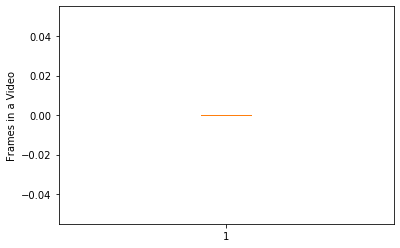

In [23]:
from video_stuff import get_hof,pre_processing
frames=[]
for file in dest:
    frames.append(get_frames_per(file))
plt.boxplot(frames)
plt.ylabel("Frames in a Video")
frames_df=pd.DataFrame(frames)
print("Total no of frames : ")
print(frames_df.sum())
print(frames_df.describe())

### Identifing ideal bagsize (With Video fps = 15 )

Something to note is that this includes clipped videos with normal videos. The best way to understand the right bagsize for the classes excluding "normal". Since these classes are expontially smaller.

#### With normal 

In [54]:
frames_df = make_hof.visualize(src_dir)

NameError: name 'os' is not defined

#### Without normal (Only classes) 

TO NOTE: this was performed simply by moving the normal class temporailiy outside the folder under operation. This may cause an error the next time it is being run.

Total no of frames : 
0    53526
dtype: int64
                 0
count    59.000000
mean    907.220339
std     926.074270
min       0.000000
25%     218.500000
50%     500.000000
75%    1411.500000
max    4320.000000


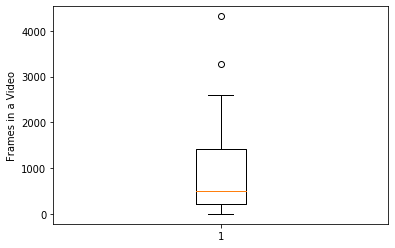

In [46]:
frames_df = make_hof.visualize(src_dir)

#### Lets just check loss of data for probable bagsize 

Beyond this point I am only using the data without normal to decide

Total Videos :  16
Total frames lost :  1386
Average frames lost per vid : 86.625
0      5
150    2
142    1
80     1
75     1
178    1
71     1
101    1
228    1
2      1
209    1
Name: 0, dtype: int64


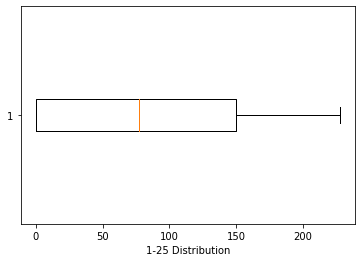

In [47]:
window_size = 256
tot_videos = len(frames_df[frames_df[0]<window_size][0])
sum_frames = sum(frames_df[frames_df[0]<window_size][0])
plt.boxplot(frames_df[frames_df[0]<window_size][0],vert=False)
plt.xlabel("1-25 Distribution")
print("Total Videos : ",tot_videos)
print("Total frames lost : ",sum_frames)
print("Average frames lost per vid :",sum_frames/tot_videos)
print(frames_df[frames_df[0]<window_size][0].value_counts())


Total Videos :  10
Total frames lost :  329
Average frames lost per vid : 32.9
0      5
75     1
71     1
80     1
101    1
2      1
Name: 0, dtype: int64


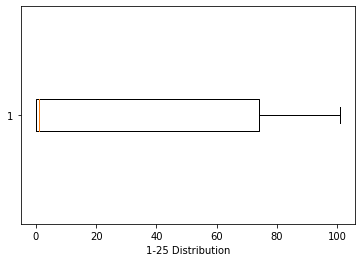

In [48]:
window_size = 128
tot_videos = len(frames_df[frames_df[0]<window_size][0])
sum_frames = sum(frames_df[frames_df[0]<window_size][0])
plt.boxplot(frames_df[frames_df[0]<window_size][0],vert=False)
plt.xlabel("1-25 Distribution")
print("Total Videos : ",tot_videos)
print("Total frames lost : ",sum_frames)
print("Average frames lost per vid :",sum_frames/tot_videos)
print(frames_df[frames_df[0]<window_size][0].value_counts())

Total Videos :  14
Total frames lost :  949
Average frames lost per vid : 67.78571428571429
0      5
150    2
142    1
75     1
178    1
71     1
101    1
2      1
80     1
Name: 0, dtype: int64


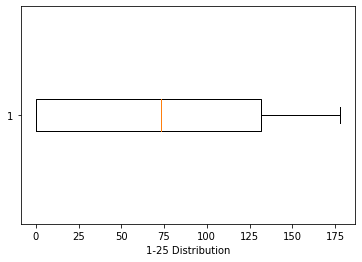

In [49]:
window_size = 192
tot_videos = len(frames_df[frames_df[0]<window_size][0])
sum_frames = sum(frames_df[frames_df[0]<window_size][0])
plt.boxplot(frames_df[frames_df[0]<window_size][0],vert=False)
plt.xlabel("1-25 Distribution")
print("Total Videos : ",tot_videos)
print("Total frames lost : ",sum_frames)
print("Average frames lost per vid :",sum_frames/tot_videos)
print(frames_df[frames_df[0]<window_size][0].value_counts())

Total Videos :  9
Total frames lost :  228
Average frames lost per vid : 25.333333333333332
0     5
75    1
71    1
80    1
2     1
Name: 0, dtype: int64


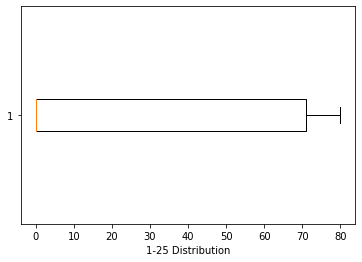

In [50]:
window_size = 96
tot_videos = len(frames_df[frames_df[0]<window_size][0])
sum_frames = sum(frames_df[frames_df[0]<window_size][0])
plt.boxplot(frames_df[frames_df[0]<window_size][0],vert=False)
plt.xlabel("1-25 Distribution")
print("Total Videos : ",tot_videos)
print("Total frames lost : ",sum_frames)
print("Average frames lost per vid :",sum_frames/tot_videos)
print(frames_df[frames_df[0]<window_size][0].value_counts())

Total no of frames : 
0    159022
dtype: int64
                 0
count   144.000000
mean   1104.319444
std    1323.865830
min       0.000000
25%     253.750000
50%     658.000000
75%    1543.500000
max    8847.000000
Total Videos :  16
Total frames lost :  210
Average frames lost per vid : 13.125
0     8
50    2
31    1
30    1
41    1
5     1
2     1
1     1
Name: 0, dtype: int64


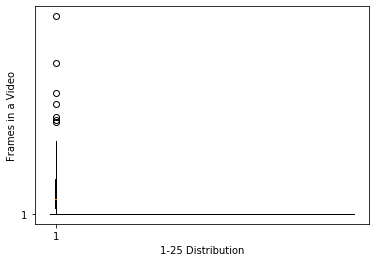

In [42]:
frames_df = make_hof.visualize(src_dir)
window_size = 64
tot_videos = len(frames_df[frames_df[0]<window_size][0])
sum_frames = sum(frames_df[frames_df[0]<window_size][0])
plt.boxplot(frames_df[frames_df[0]<window_size][0],vert=False)
plt.xlabel("1-25 Distribution")
print("Total Videos : ",tot_videos)
print("Total frames lost : ",sum_frames)
print("Average frames lost per vid :",sum_frames/tot_videos)
print(frames_df[frames_df[0]<window_size][0].value_counts())


Below 128 , the loss is very comparable . To understand if there exists any potential tradeoff in accuracy vs test time I'll consider 2 bag sizes 128 and 256 which is approx. 4s and 8s  


## Preprocesing with bagsize 128

In [1]:
ls UCF_Crime/

 64_16/                        RAW/
 Anomaly_Dataset_reduced/      TESTER/
 Anomaly_Dataset_reduced.zip   UCF_CRIME_COMPLETE_8/
'Deleted By Mistake'/          UCF_CRIME_COMPLETE_8_UNBIASED/
'Deleted By Mistake.zip'       __pycache__/


In [10]:
df_128 = make_hof.get_processed_hof(src_folder=src_dir,bagsize=128)
df_128.to_csv('/home/adithyapa4444_gmail_com/UCF_Crime/Crime_128_UB.csv')

/home/adithyapa4444_gmail_com/make_hof.py:56: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  dfa=pd.concat([dfa,df])


In [11]:
df_128.head()

,feat_0,feat_1,feat_10,feat_100,feat_101,feat_102,feat_103,feat_104,feat_105,feat_106,...,feat_92,feat_93,feat_94,feat_95,feat_96,feat_97,feat_98,feat_99,label,video_path
29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011682,0.0,0.0,...,0.0,0.0,0.000043,0.0,0.0,0.0,0.0,0.025672,0,/home/adithyapa4444_gmail_com/UCF_Crime/UCF_CR...
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012977,0.0,0.0,...,0.0,0.0,0.031043,0.0,0.0,0.0,0.0,0.033172,0,/home/adithyapa4444_gmail_com/UCF_Crime/UCF_CR...
31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009245,0.0,0.0,...,0.0,0.0,0.029927,0.0,0.0,0.0,0.0,0.052936,0,/home/adithyapa4444_gmail_com/UCF_Crime/UCF_CR...
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073169,0.0,0.0,...,0.0,0.0,0.012461,0.0,0.0,0.0,0.0,0.019947,0,/home/adithyapa4444_gmail_com/UCF_Crime/UCF_CR...
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011788,0.0,0.0,...,0.0,0.0,0.026785,0.0,0.0,0.0,0.0,0.034997,0,/home/adithyapa4444_gmail_com/UCF_Crime/UCF_CR...


In [6]:
ls UCF_Crime/

 Anomaly_Dataset_reduced/     'Deleted By Mistake.zip'
 Anomaly_Dataset_reduced.zip   TESTER/


In [10]:
del df_128

Results for this run have been saved at ./Results/CRIME/lstm .


## Results eval for 128